# Camera Calibration

In [129]:
# Set the right working folder to root folder of the project
import os

print("Looking for root folder of the project...")
for folder_depth in range(100): 
    if os.path.exists(".git"):
        root_folder = os.getcwd()
        print("Root folder found. Now working in directory '%s'" % os.getcwd())
        break
    else:
        print("Going up from '%s'" % os.getcwd())
        os.chdir("..")
else:
    raise Exception("Root folder of the project not found. Terminating.")
    

Looking for root folder of the project...
Root folder found. Now working in directory 'C:\Users\linas\projects\CarND-Advanced-Lane-Lines'


#### Images we have for camera calibration

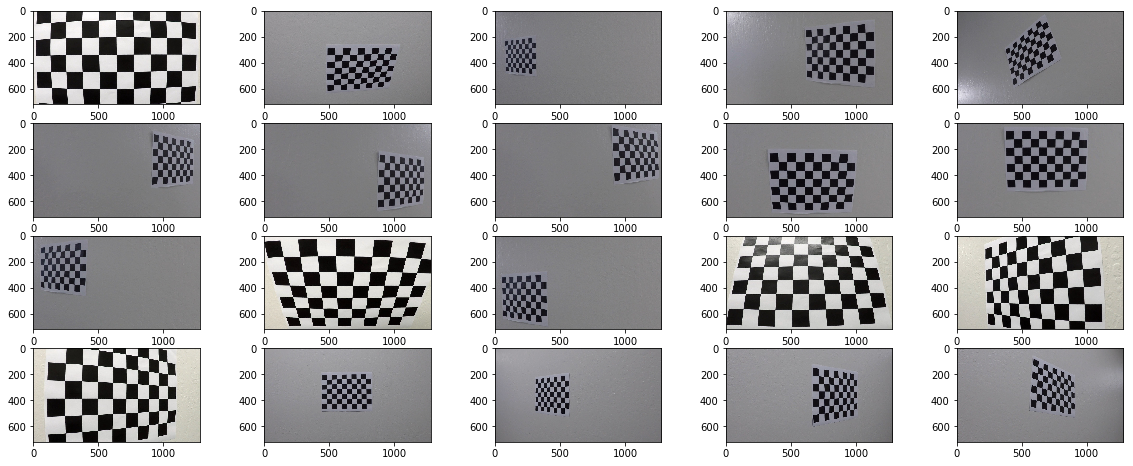

In [51]:
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline


# Read in images
image_path_pattern = os.path.join(root_folder, "data", "camera_cal", "calibration*.jpg")
images = [mpimg.imread(img_path) for img_path in glob.glob(image_path_pattern)]

# Plot images
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    

In [130]:
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import cv2

### Read in images
image_path_pattern = os.path.join(root_folder, "data", "camera_cal", "calibration*.jpg")
images = [mpimg.imread(img_path) for img_path in glob.glob(image_path_pattern)]

### Undistort images
chess_x = 9
chess_y = 6

objp = np.zeros((chess_x * chess_y, 3), np.float32)
imgp = objp[:, :2] = np.mgrid[0:chess_x, 0:chess_y].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
image_copies = [] # will copyy images where pattern was found for quality control

# Find chessboard corners
for img in images:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (chess_x, chess_y), None)
    
    if ret:
        objpoints.append(objp)
        
        # Increase the precision of corner detection
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)  # stop after gains are less than 0.001 + iterate at most 30 times.   
        corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        image_copies.append(img)


`cv2.cornerSubPix` caused me a great deal of trouble back when I was in university, so I won't risk it and plot the output here and now.

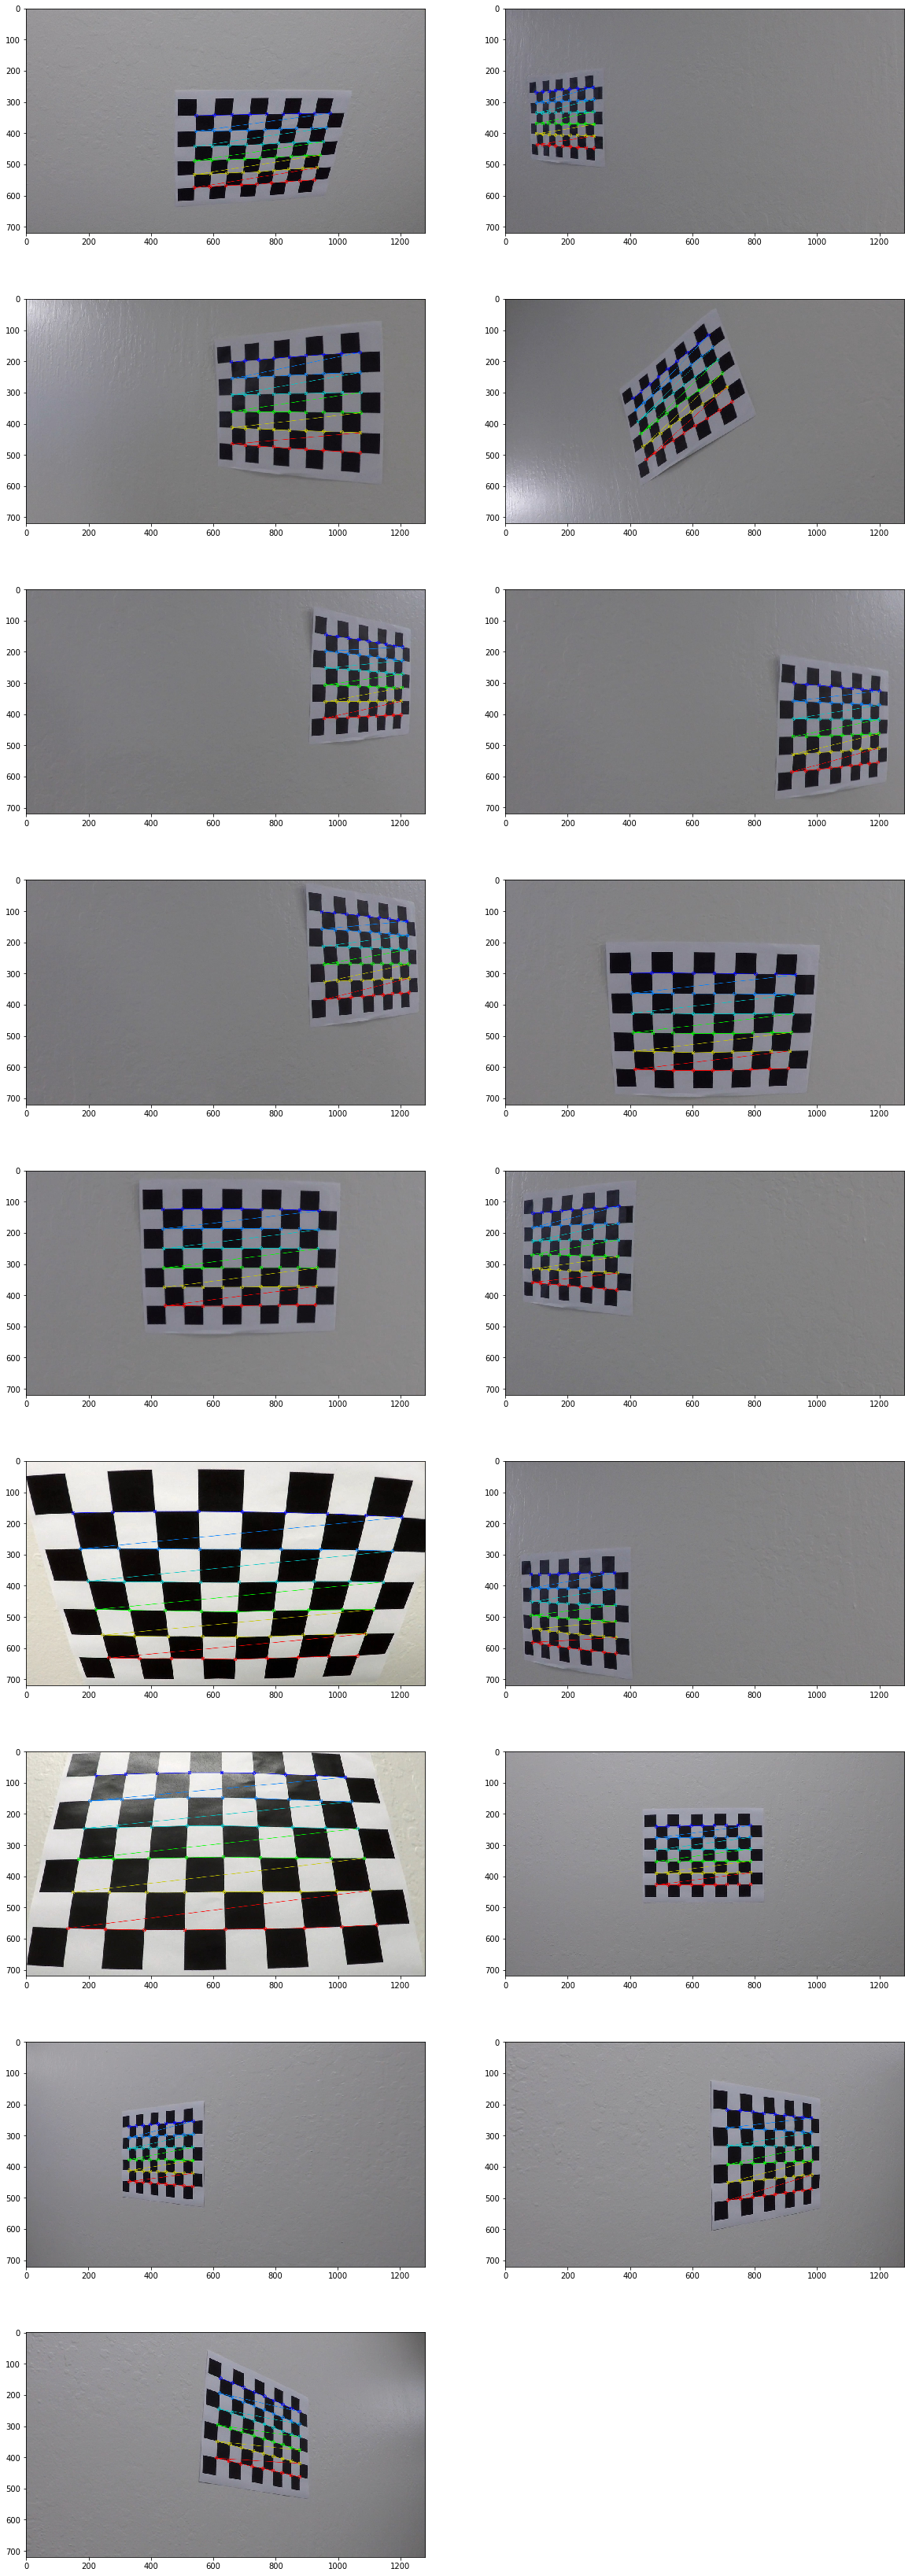

In [110]:
for i in range(len(image_copies)):
    cv2.drawChessboardCorners(image_copies[i], (chess_x, chess_y), imgpoints[i], True)

# Plot images
plt.figure(figsize=(20, 60))
columns = 2
for i, img_c in enumerate(image_copies):
    plt.subplot(len(image_copies) / columns + 1, columns, i + 1)
    plt.imshow(img_c)

Looking at the images, everything seems in order. Phew!

#### Display undistorted
Next, display some undistorted images. It seems that the images where the board is far on the wall are fairly hard to see. I've hand-picked some close-ups to see the result better. Below you'll see the plots of original images and their undistorted versions.

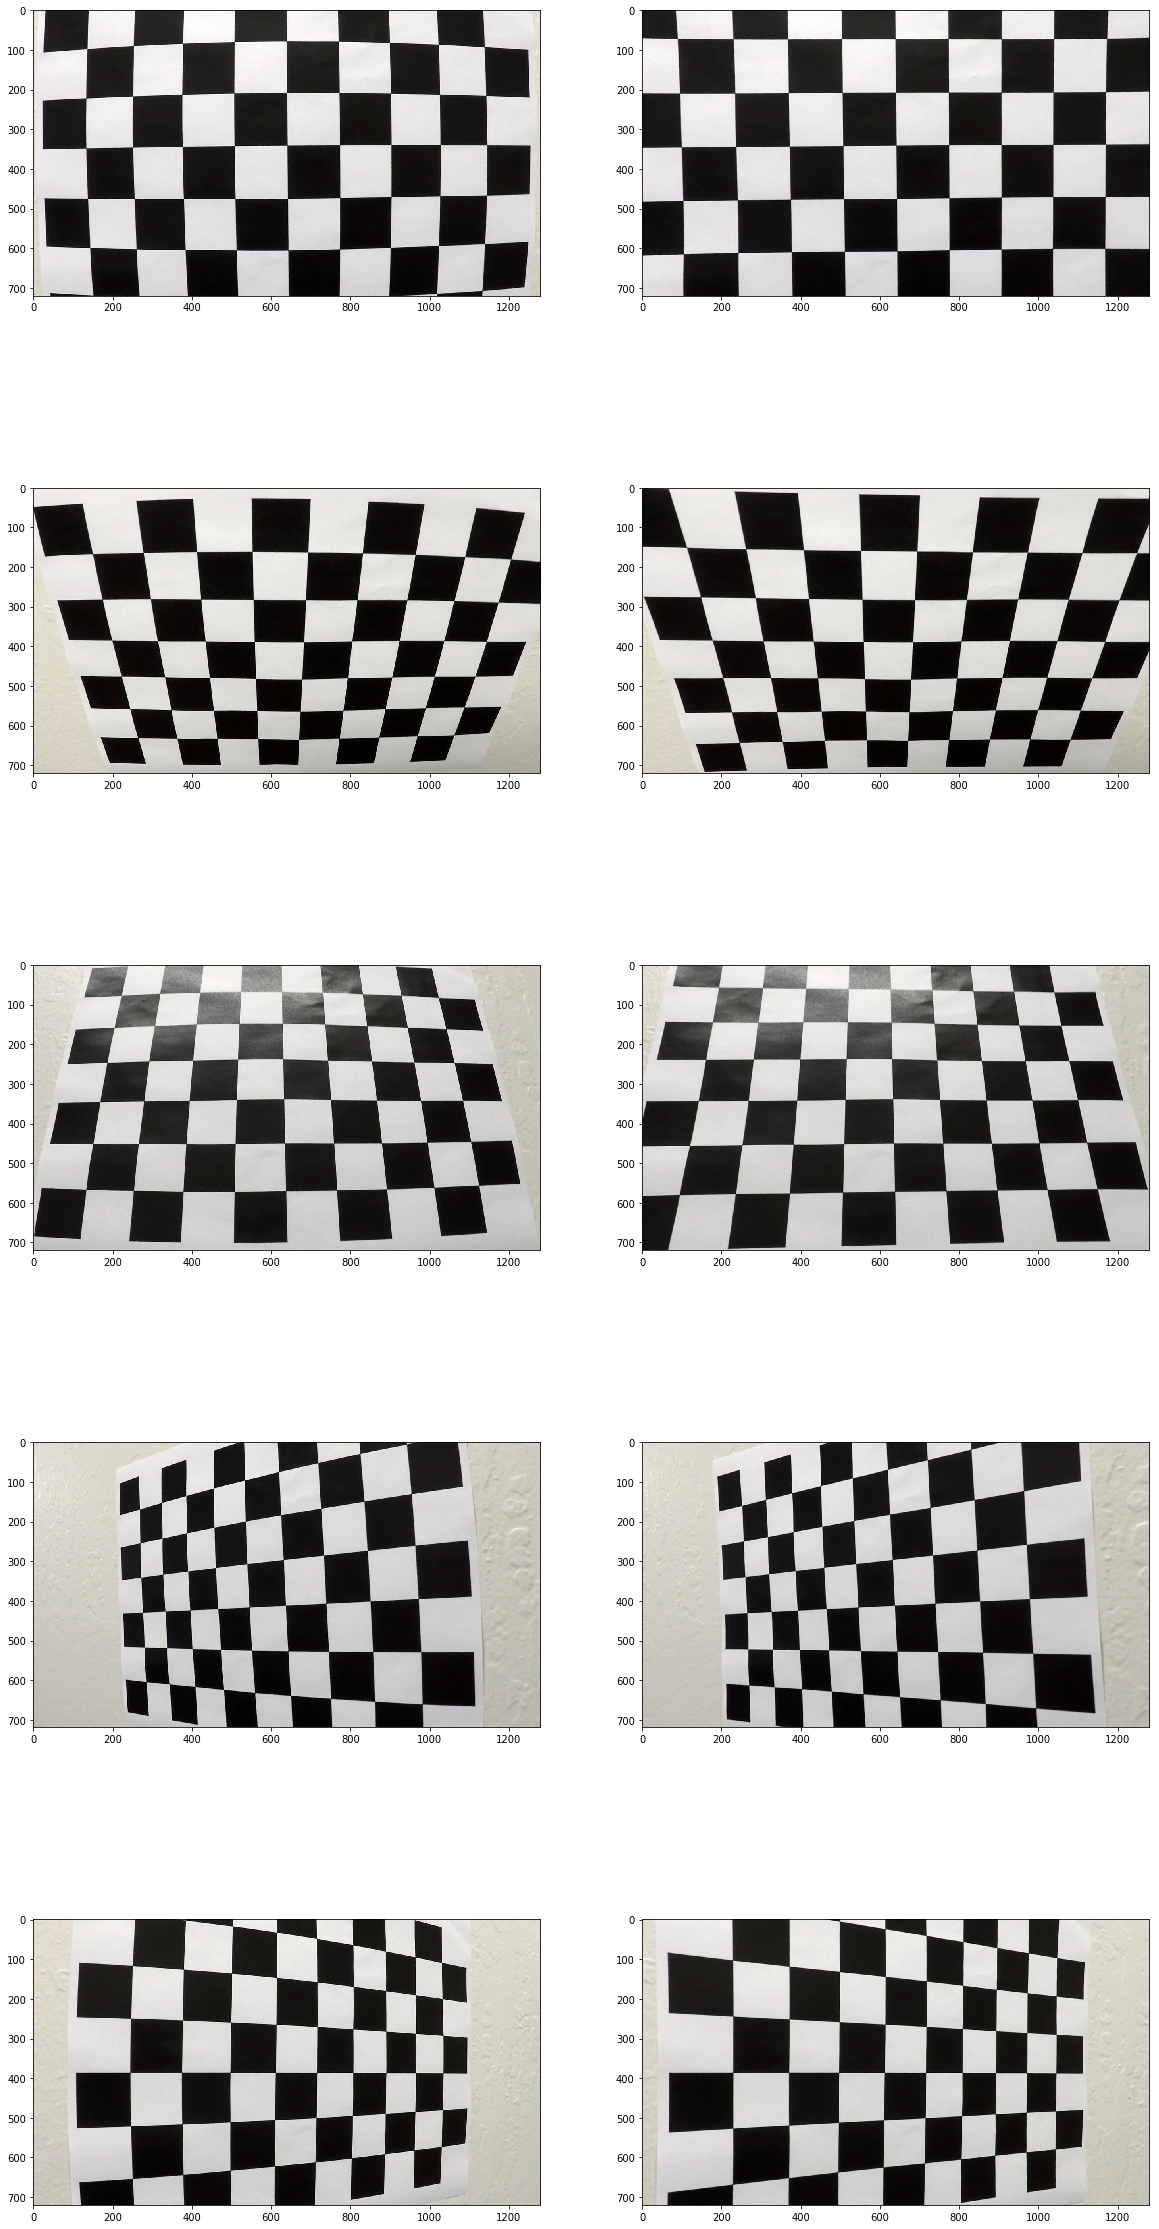

In [131]:
# Get the camera matrix and callibration coefficients
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

mtx_filename  = os.path.join(root_folder, "params", "camera_matrix.npy")
dist_filename = os.path.join(root_folder, "params", "dist_coeffs.npy")
np.save(mtx_filename, mtx)
np.save(dist_filename, dist)

# Plot undistorted images
plt.figure(figsize=(20, 60))
columns = 2
selected_image_indices = [0, 11, 13, 14, 15]  # hand-picked, so the undistortion is seen clearer.
for i, img_index in enumerate(selected_image_indices):
    image = images[img_index]
    plt.subplot((len(selected_image_indices) / columns + 1) * 2, columns, i * 2 + 1)
    plt.imshow(image)
    
    undistorted_img = cv2.undistort(image, mtx, dist, None, mtx)
    plt.subplot((len(selected_image_indices) / columns + 1) * 2, columns, i * 2 + 2)
    plt.imshow(undistorted_img)
    
    undist_img_filename = os.path.join(root_folder, "results", "undistorted_images", "undistorted_image_%d.jpg" % img_index)
    plt.imsave(undist_img_filename, undistorted_img)
    